In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
Ls = (2,4,8,16,24,32,48,64) # 8,16,24,32,48,64,96 ,24,32,48,64,96,128

ells = np.array([
    3.5332468089730167948303574e-01, #2
    1.7445911860988461139498895e-01, #4
    8.6931921829540209634146208e-02, #8
    4.3428018228467167582973474e-02, #16
    2.8947305985435316244558379e-02, #24
    2.1709242904607010948847545e-02, #32
    1.4472239495843164727717500e-02, #48
    1.0854024943202365480199312e-02, #64
#     7.2359429642320704720304114e-03,
#     5.4269378850346815593153060e-03
])

In [3]:
trT0=[]

In [4]:
results=[]
trT0=[]
trTLH=[]
for L in Ls:
    trT = np.loadtxt("obs_L"+str(L)+"_0/trT_jk.dat")
    results.append([L,trT])
    trT0.append(trT[-1])
    trTLH.append(trT[int(L/2)])

In [5]:
markers=("x","+","*",'o','t')
colors=("red","green","magenta","blue",'brown')

In [6]:
np.array(trT0).T[0]

array([0.86507327, 0.69332815, 0.65046819, 0.64000949, 0.6390318 ,
       0.63734111, 0.6370964 , 0.63678668])

<ErrorbarContainer object of 3 artists>

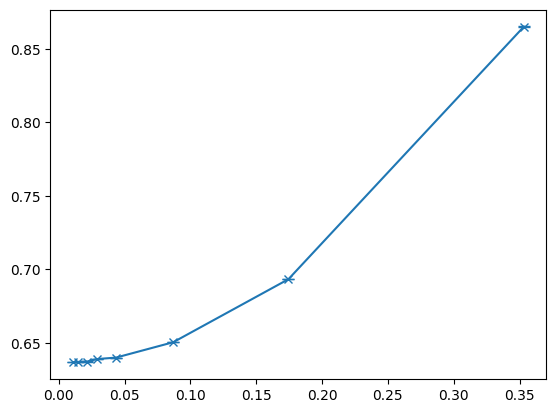

In [7]:
plt.errorbar( ells, np.array(trT0).T[0], np.array(trT0).T[1],
            marker='x', capsize=4)
# plt.xscale("log")

In [8]:
def quad(x, a, b):
    return a*x**2 + b

In [9]:
fitm=1
# fitM

opt = sp.optimize.curve_fit( quad, ells[fitm:], np.array(trT0).T[0][fitm:],
                           sigma=np.array(trT0).T[1][fitm:], absolute_sigma=True)

In [10]:
opt[0][0]

1.8354549940911074

In [11]:
np.sqrt(opt[1][0][0])

0.0021844481558642628

In [12]:
xx = np.linspace(0, ells[fitm],100)
yy = quad( xx, opt[0][0], opt[0][1] )

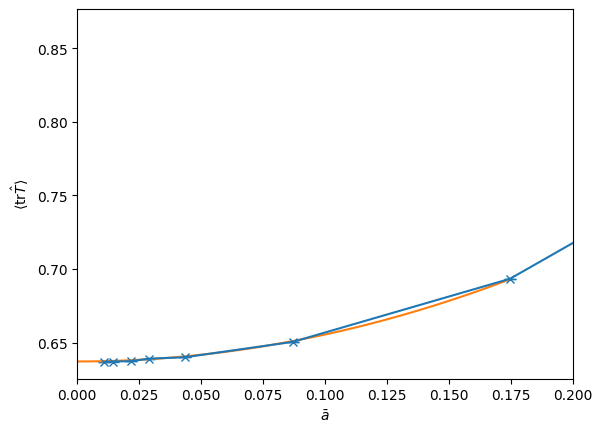

In [13]:
plt.errorbar( ells, np.array(trT0).T[0], np.array(trT0).T[1],
            marker='x', capsize=4)

plt.plot(xx, yy)

plt.xlim(0.0,0.2)
# plt.ylim(-0.264,-0.26)
# plt.xscale("log")

plt.ylabel("$\\langle {\\rm tr}\\hat{T} \\rangle$")
plt.xlabel("$\\bar{a}$")
plt.savefig("trT.pdf", bbox_inches='tight')

<ErrorbarContainer object of 3 artists>

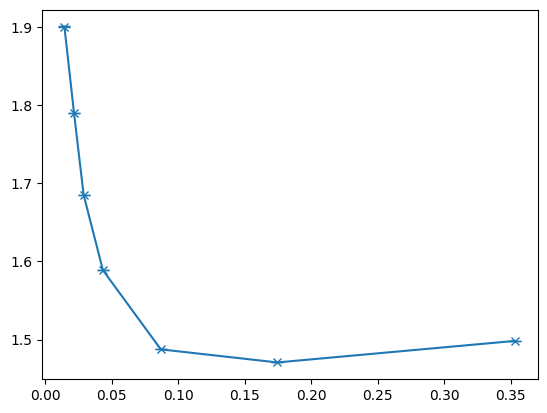

In [11]:
plt.errorbar( ells, np.array(trTLH).T[0], np.array(trTLH).T[1],
            marker='x', capsize=4)
# plt.xscale("log")